In [1]:
import requests
import pandas as pd
import matplotlib as plt

In [2]:
url = "https://covidtracking.com/api/states/daily"
response = requests.get(url)

In [3]:
json = response.json()

In [4]:
response_df = pd.DataFrame(json)

In [5]:
response_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200713,AK,1539.0,145051.0,NaN,22.0,NaN,NaN,NaN,0.0,...,146590,0,0,4572301f99d3fc09b76a0c0f921beaa75d523071,0,0,0,0,0,
1,20200713,AL,55545.0,464059.0,NaN,1335.0,6745.0,NaN,919.0,NaN,...,519604,3,0,687ba2f41ad0c4555c0efffcd3fd58077c0bb283,0,0,0,0,0,
2,20200713,AR,28939.0,354035.0,NaN,439.0,1836.0,NaN,NaN,89.0,...,382974,2,14,e02e6334276294a3d483f46a87ac36cc3219e020,0,0,0,0,0,
3,20200713,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,816,0,0,de8272ffc363fad387e8f09008135cae86307146,0,0,0,0,0,
4,20200713,AZ,123824.0,578602.0,NaN,3373.0,5839.0,936.0,NaN,671.0,...,702426,8,44,b1bd0e48bc4b6b032fd2f4802c62779816f7c3ca,0,0,0,0,0,


In [6]:
response_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

In [7]:
response_df.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
count,7.297000e+03,7282.000000,7.141000e+03,998.000000,4688.000000,3779.000000,2399.000000,1005.000000,2101.000000,354.000000,...,7.297000e+03,7297.000000,7.297000e+03,7297.000000,7297.000000,7297.0,7297.0,7297.0,7297.0,7297.0
mean,2.020049e+07,23354.137874,2.113196e+05,1150.002004,943.177048,4738.735115,395.325135,694.483582,194.422180,177.974576,...,2.301080e+05,5619.176511,2.301080e+05,17.542004,36.297245,0.0,0.0,0.0,0.0,0.0
std,1.267988e+02,50678.059429,4.481059e+05,6093.955716,1836.832271,13263.165443,667.915338,602.191917,303.322245,114.957718,...,4.872947e+05,11374.758732,4.872947e+05,55.678741,283.701832,0.0,0.0,0.0,0.0,0.0
min,2.020012e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,0.000000e+00,-74189.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0
25%,2.020041e+07,499.750000,9.521000e+03,14.000000,93.000000,262.000000,66.000000,191.000000,26.000000,101.000000,...,8.464000e+03,247.000000,8.464000e+03,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.020051e+07,5157.500000,6.218500e+04,111.500000,368.000000,1152.000000,156.000000,515.000000,86.000000,143.000000,...,6.552800e+04,1776.000000,6.552800e+04,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.020061e+07,23431.500000,2.218740e+05,477.000000,906.000000,3758.000000,393.000000,1014.000000,209.000000,207.750000,...,2.416360e+05,6258.000000,2.416360e+05,14.000000,18.000000,0.0,0.0,0.0,0.0,0.0
max,2.020071e+07,402263.000000,5.215203e+06,64400.000000,18825.000000,89995.000000,5225.000000,2643.000000,2425.000000,505.000000,...,5.544365e+06,165227.000000,5.544365e+06,1877.000000,16373.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
positive_states = response_df[["date", "state", "positive", "recovered", "hospitalized", 'onVentilatorCurrently', "death", "total", "totalTestResults"]]
positive_states

,date,state,positive,recovered,hospitalized,onVentilatorCurrently,death,total,totalTestResults
0,20200713,AK,1539.0,620.0,NaN,0.0,17.0,146590,146590
1,20200713,AL,55545.0,25783.0,6745.0,NaN,1124.0,519604,519604
2,20200713,AR,28939.0,22106.0,1836.0,89.0,323.0,382974,382974
3,20200713,AS,0.0,NaN,NaN,NaN,0.0,816,816
4,20200713,AZ,123824.0,15254.0,5839.0,671.0,2245.0,702426,702426
...,...,...,...,...,...,...,...,...,...
7292,20200126,WA,2.0,NaN,NaN,NaN,NaN,2,2
7293,20200125,WA,2.0,NaN,NaN,NaN,NaN,2,2
7294,20200124,WA,2.0,NaN,NaN,NaN,NaN,2,2
7295,20200123,WA,2.0,NaN,NaN,NaN,NaN,2,2


In [9]:
date_state_df = response_df[['date', 'positive', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']].groupby(['date']).sum()
date_state_df

,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death
date,,,,,
20200122,2.0,0.0,0.0,0.0,0.0
20200123,2.0,0.0,0.0,0.0,0.0
20200124,2.0,0.0,0.0,0.0,0.0
20200125,2.0,0.0,0.0,0.0,0.0
20200126,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200709,3101339.0,43895.0,5839.0,2127.0,125590.0
20200710,3167984.0,51544.0,5889.0,2197.0,126444.0
20200711,3230991.0,51798.0,5928.0,2169.0,127201.0


In [10]:
date_state_df.plot()

In [11]:
column_names = date_state_df.columns
for column in column_names:
    date_state_df[f"{column}_roc"] = date_state_df[f'{column}'].diff()
rate_of_change_df = date_state_df.drop(columns=column_names)
rate_of_change_df

,positive_roc,hospitalizedCurrently_roc,inIcuCurrently_roc,onVentilatorCurrently_roc,death_roc
date,,,,,
20200122,NaN,NaN,NaN,NaN,NaN
20200123,0.0,0.0,0.0,0.0,0.0
20200124,0.0,0.0,0.0,0.0,0.0
20200125,0.0,0.0,0.0,0.0,0.0
20200126,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200709,58836.0,891.0,-28.0,-45.0,867.0
20200710,66645.0,7649.0,50.0,70.0,854.0
20200711,63007.0,254.0,39.0,-28.0,757.0


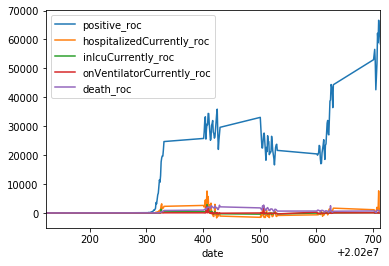

In [12]:
rate_of_change_df.plot()

In [13]:
date_dmv_df = response_df[['date', 'positive', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']].loc[response_df['state'].isin(['VA', 'DC', 'MD'])].groupby(['date']).sum()
date_dmv_df

,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death
date,,,,,
20200305,0.0,0.0,0.0,0.0,0.0
20200306,3.0,0.0,0.0,0.0,0.0
20200307,3.0,0.0,0.0,0.0,0.0
20200308,6.0,0.0,0.0,0.0,0.0
20200309,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200709,150114.0,1454.0,380.0,107.0,5793.0
20200710,151584.0,1487.0,382.0,120.0,5829.0
20200711,153050.0,1502.0,379.0,114.0,5840.0


In [14]:
column_names = date_dmv_df.columns
for column in column_names:
    date_dmv_df[f"{column}_roc"] = date_dmv_df[f'{column}'].diff()
dmv_rate_of_change_df = date_dmv_df.drop(columns=column_names)
dmv_rate_of_change_df

,positive_roc,hospitalizedCurrently_roc,inIcuCurrently_roc,onVentilatorCurrently_roc,death_roc
date,,,,,
20200305,NaN,NaN,NaN,NaN,NaN
20200306,3.0,0.0,0.0,0.0,0.0
20200307,0.0,0.0,0.0,0.0,0.0
20200308,3.0,0.0,0.0,0.0,0.0
20200309,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200709,1236.0,-1.0,-16.0,-8.0,49.0
20200710,1470.0,33.0,2.0,13.0,36.0
20200711,1466.0,15.0,-3.0,-6.0,11.0


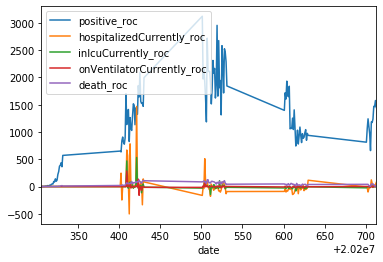

In [15]:
dmv_rate_of_change_df.plot()

In [16]:
date_va_df = response_df[['date', 'positive', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']].loc[response_df['state'].isin(['VA'])].groupby(['date']).sum()
date_va_df
# column_names = date_va_df.columns
# for column in column_names:
#     date_va_df[f"{column}_roc"] = date_va_df[f'{column}'].diff()
# va_rate_of_change_df = date_va_df.drop(columns=column_names)
# va_rate_of_change_df
# va_rate_of_change_df.plot()

,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death
date,,,,,
20200305,0.0,0.0,0.0,0.0,0.0
20200306,0.0,0.0,0.0,0.0,0.0
20200307,0.0,0.0,0.0,0.0,0.0
20200308,2.0,0.0,0.0,0.0,0.0
20200309,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200709,67988.0,956.0,215.0,93.0,1937.0
20200710,68931.0,1006.0,234.0,102.0,1958.0
20200711,69782.0,1020.0,230.0,97.0,1962.0


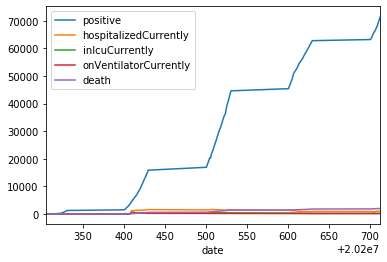

In [17]:
date_va_df.plot()

In [18]:
def plotROC(df):
    column_names = df.columns
    state_input = input('Add your state abbrev in caps')
    print(state_input)
    for column in column_names:
        df[f"{column}_roc"] = df[f'{column}'].diff()
    roc_df = df.drop(columns=column_names)
    return roc_df.plot()

Add your state abbrev in capsVA
VA


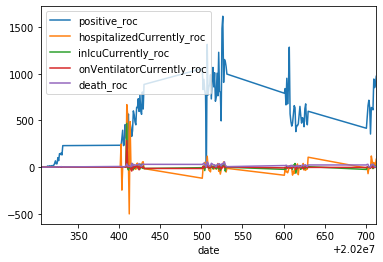

In [19]:
plotROC(date_va_df)

In [20]:
date_va_df

,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death,positive_roc,hospitalizedCurrently_roc,inIcuCurrently_roc,onVentilatorCurrently_roc,death_roc
date,,,,,,,,,,
20200305,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
20200306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20200307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20200308,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
20200309,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20200709,67988.0,956.0,215.0,93.0,1937.0,613.0,-15.0,-15.0,-5.0,32.0
20200710,68931.0,1006.0,234.0,102.0,1958.0,943.0,50.0,19.0,9.0,21.0
20200711,69782.0,1020.0,230.0,97.0,1962.0,851.0,14.0,-4.0,-5.0,4.0
